In [1]:
## MODULES ##
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray
import pandas as pd
import datetime as dt
import numpy as np
import sys
import pickle

# #own scripts
sys.path.append('../utilities_tlezuo/')
import locfunctions as lf
import varfunctions as vf
from timefunctions import *

from ipdb import set_trace

#  define class of pc_dict
class Point_coordinates:
    def __init__(self, shortname, name, color, marker, lat, lon, altitude, iconID, iconHSURF, iconHHL, iconHFL, height_dict):
        self.short = shortname
        self.name = name
        self.color = color
        self.marker = marker
        self.lat = lat
        self.lon = lon
        self.alt = altitude
        self.iconID = iconID 
        self.iconHSURF = iconHSURF
        self.iconHHL = iconHHL
        self.iconHFL = iconHFL
        self.hdict = height_dict 


# load pc_dict and its lists
pc_dict = np.load('../utilities_tlezuo/pc_dict.npy',allow_pickle=True).item()
with open ('../utilities_tlezuo/pc_iconID_list','rb') as f:
    pc_iconID_list = pickle.load(f)
with open ('../utilities_tlezuo/pc_short_list','rb') as a:
    pc_short_list = pickle.load(a)

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
###############################################################################################
## CONSTANT FILE  ##
c_filename = "lfff00000000c.nc"
filepath = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'
const_file = filepath + c_filename
data_c = psy.open_dataset(const_file)


plotting area stations area
     plotting variable HSURF


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_maps/plotters.py:1691: UserWarning: Filled contour plots of unstructured data are not correctly warped around!
  warnings.warn('Filled contour plots of unstructured data are not '


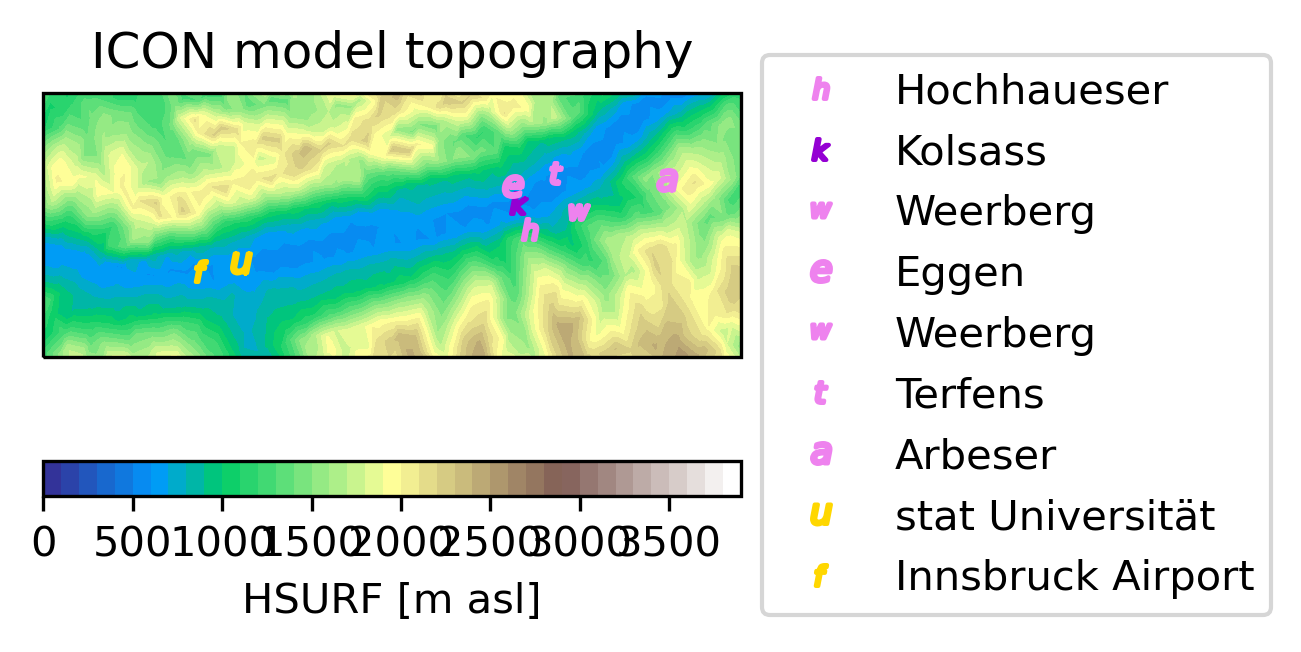

In [3]:

###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
# decide which areas to plot
area=lf.stat_only

# decide which variables to plot
pvar = vf.HSURF
# decide how to plot it
plottype = 'contourf' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines
###############################################################################################
## PLOT SETUP ##
# loop 1 over areas
# check printout
print('plotting area '+area.name)

print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)

    
# title specific to area, variable, time
title = 'ICON model '+pvar.title
plotname = str(area.name)+'_'+pvar.name+'_'+plottype+'.png'


###############################################################################################
## PLOT ##
#plot
# set_trace()
pp = psy.plot.mapplot(data_c,
    name = pvar.name,
    t = 0,
    projection = 'robin',
    plot=plottype,
    bounds = np.arange(pvar.min,pvar.max,pvar.ticks),#{'method': 'minmax', 'vmin':pvar.min, 'vmax':pvar.max},
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    title = title,
    cmap=pvar.cmap,
    cticks=np.arange(pvar.min,pvar.max,pvar.ticks*5),
    clabel = pvar.name+' '+pvar.units,
    xgrid = False, ygrid = False,
    )
# set_trace()
#annotations
fig = plt.gcf()
fig.set_size_inches(3,3)
handles_list=[]
labels_list=[]
for locmark in area.locmarks:
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    fig.axes[0].plot(pos_lon, pos_lat,color=pc_dict[locmark].color,marker=pc_dict[locmark].marker, markersize=5, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None') 
    # handles_list.append(locmark.marker)
    # labels_list.append(locmark.name)
    # if locmark.name == 'Station Flughafen':
    #     fig.axes[0].text(pos_lon-0.06, pos_lat+0.03,locmark.name, transform=fig.axes[0].transAxes,color=locmark.color,fontsize=16)
    #     fig.axes[0].plot(pos_lon, pos_lat,color=locmark.color,marker= '.', markersize=20, transform=fig.axes[0].transAxes,label=locmark.name,linestyle='None') 
    
fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.7))
plt.rcParams['figure.dpi'] = 300
# save figure
pp.update()

plotting area inn_area
     plotting variable HSURF


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':


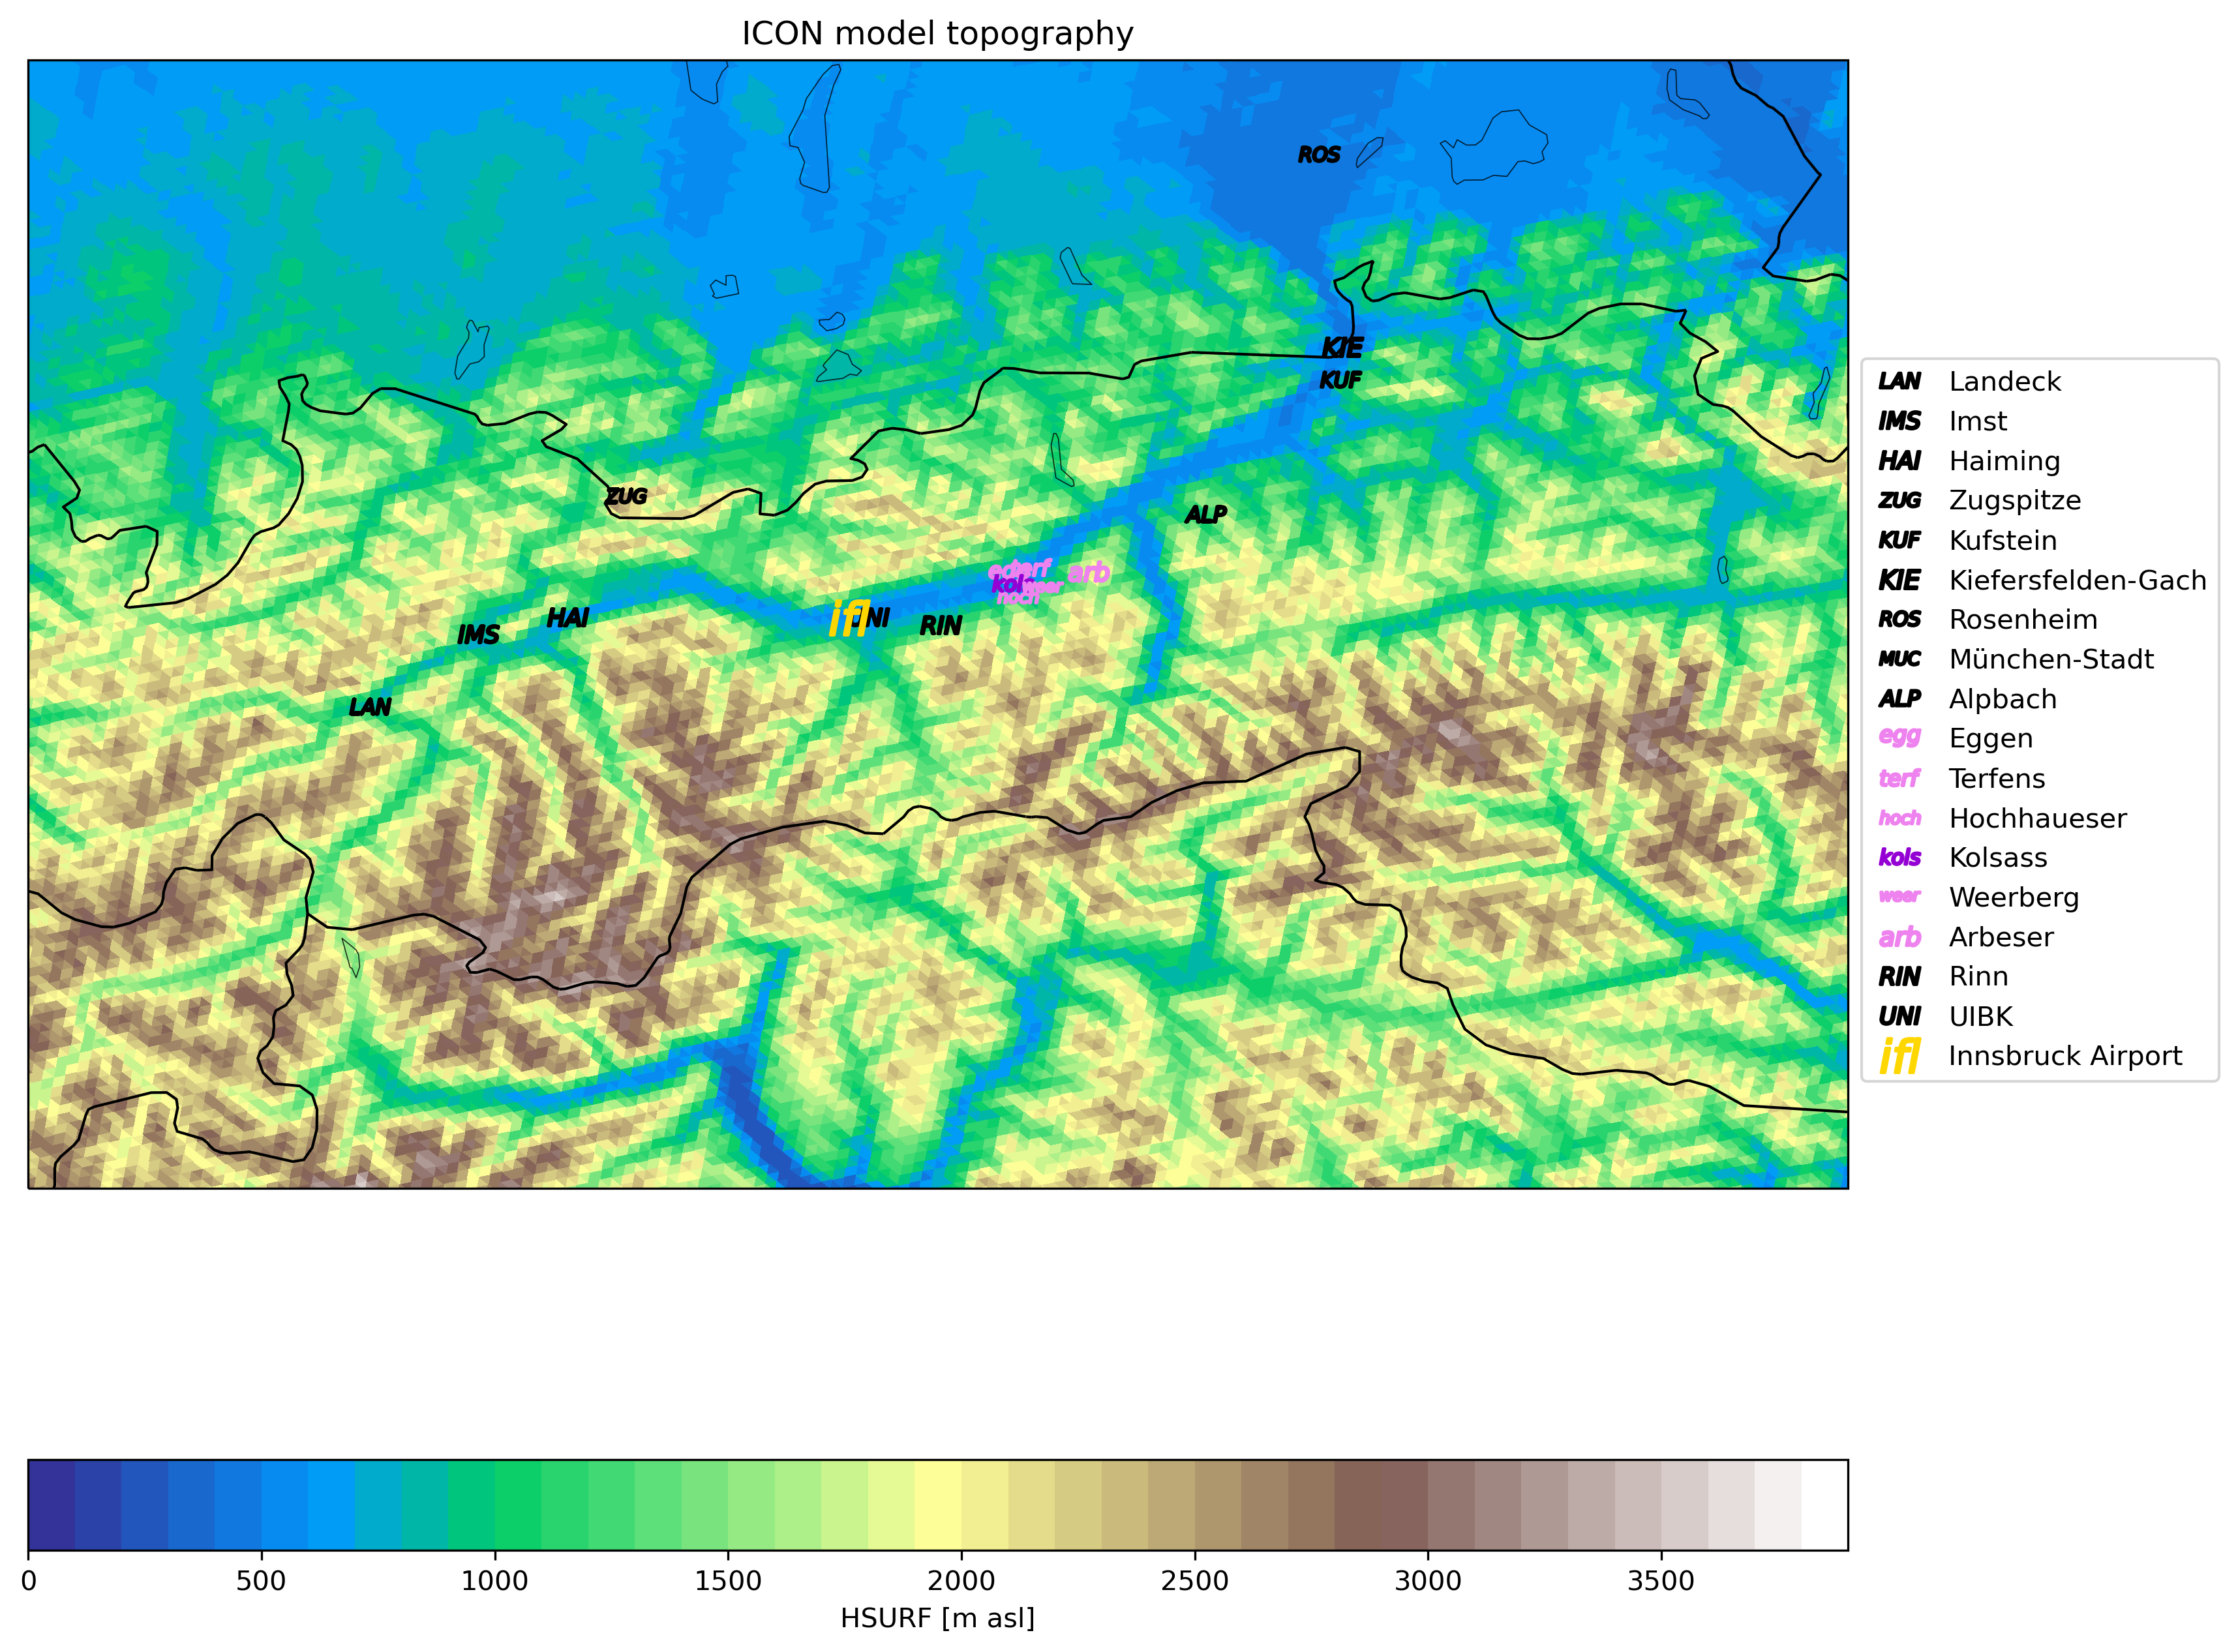

In [4]:
###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
# decide which areas to plot
area=lf.inn_area

# decide which variables to plot
pvar = vf.HSURF
# decide how to plot it
plottype = 'poly' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines

###############################################################################################
## PLOT SETUP ##
# loop 1 over areas
# check printout
print('plotting area '+area.name)

print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)

    
# title specific to area, variable, time
title = 'ICON model '+pvar.title
plotname = str(area.name)+'_'+pvar.name+'_'+plottype+'.png'


###############################################################################################
## PLOT ##
#plot
# set_trace()
pp = psy.plot.mapplot(data_c,
    name = pvar.name,
    t = 0,
    projection = 'robin',
    plot=plottype,
    bounds = np.arange(pvar.min,pvar.max,pvar.ticks),#{'method': 'minmax', 'vmin':pvar.min, 'vmax':pvar.max},
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    title = title,
    cmap=pvar.cmap,
    cticks=np.arange(pvar.min,pvar.max,pvar.ticks*5),
    clabel = pvar.name+' '+pvar.units,
    xgrid = False, ygrid = False,
    )
# set_trace()
#annotations
fig = plt.gcf()
fig.set_size_inches(12,12)
handles_list=[]
labels_list=[]

pc_innvalley_list = ['LAN','IMS','HAI','ZUG','KUF','KIE','ROS','MUC','ALP','egg','terf','hoch','kols','weer','arb','RIN','UNI','ifl']
for locmark in pc_innvalley_list:
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    fig.axes[0].plot(pos_lon, pos_lat,color=pc_dict[locmark].color,marker='$'+locmark+'$', markersize=15, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None') 
    # handles_list.append(locmark.marker)
    # labels_list.append(locmark.name)
    # if locmark.name == 'Station Flughafen':
    #     fig.axes[0].text(pos_lon-0.06, pos_lat+0.03,locmark.name, transform=fig.axes[0].transAxes,color=locmark.color,fontsize=16)
    #     fig.axes[0].plot(pos_lon, pos_lat,color=locmark.color,marker= '.', markersize=20, transform=fig.axes[0].transAxes,label=locmark.name,linestyle='None') 
    
fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.7))
plt.rcParams['figure.dpi'] = 300
# save figure
pp.update()